AI Phase 1

```
Hossam Elsabbagh 202202228
```

***

# ***Import Libraries***

In [74]:
import time, tracemalloc
import matplotlib.pyplot as plt
import numpy as np
import heapq
from collections import deque

# ***Maze***

In [58]:
maze = [
    [0,0,1,0,0,0,0,1,0,0],
    [1,0,1,0,1,1,0,1,0,0],
    [0,0,0,0,0,1,0,0,0,1],
    [0,1,1,1,0,1,0,1,0,0],
    [0,0,0,1,0,0,0,1,1,0],
    [1,1,0,0,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,1,0,1],
    [0,1,0,1,1,1,0,1,0,0],
    [0,1,0,0,0,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0]
]

start = (0, 0)   # Starting point
goal  = (9, 9)   # Goal point

# ***Utils***

In [59]:
def valid(x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == 0

def get_neighbors(state):
    x, y = state
    moves = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]  # up, down, left, right
    return [(nx, ny) for nx, ny in moves if valid(nx, ny)]

def reconstruct_path(parent, state):
    path = []
    while state is not None:
        path.append(state)
        state = parent.get(state)
    return list(reversed(path))  #reverse to get start->goal


# ***BFS***

In [77]:
def BFS(start, goal):
    queue = deque([start])
    visited = set([start])
    parent = {start: None}

    while queue:
        cur = queue.popleft() # FIFO

        if cur == goal:
            return reconstruct_path(parent, goal)

        for nxt in get_neighbors(cur):
            if nxt not in visited:
                visited.add(nxt)
                parent[nxt] = cur
                queue.append(nxt)

    return None

# ***DFS***

In [71]:
def DFS(start, goal):
    stack = [start]
    visited = set([start])
    parent = {start: None}

    while stack:
        current = stack.pop()  # LIFO

        if current == goal:
            return reconstruct_path(parent, goal)

        for nxt in get_neighbors(current):
            if nxt not in visited:
                visited.add(nxt)
                parent[nxt] = current
                stack.append(nxt)

    return None

# ***UCS***

In [61]:
def UCS(start, goal):
    pq = [(0, start)]
    visited = set()
    parent = {start: None}
    cost = {start: 0}

    while pq:
        g, current = heapq.heappop(pq)  # Priority queue with cost 0

        if current == goal:
            return reconstruct_path(parent, goal)

        if current in visited:
            continue
        visited.add(current)

        for nxt in get_neighbors(current):
            new_cost = cost[current] + 1    # Node with lowest cost
            if nxt not in cost or new_cost < cost[nxt]:
                cost[nxt] = new_cost
                parent[nxt] = current
                heapq.heappush(pq, (new_cost, nxt))

    return None

# ***IDS***

In [73]:
def DLS(node, goal, depth, visited, parent):
    if node == goal:
        return True
    if depth == 0:
        return False

    for nxt in get_neighbors(node):
        if nxt not in visited:
            visited.add(nxt)
            parent[nxt] = node
            if DLS(nxt, goal, depth-1, visited, parent):
                return True
    return False

def IDS(start, goal, max_depth=200):
    for depth in range(max_depth):
        visited = set([start])
        parent = {start: None}
        if DLS(start, goal, depth, visited, parent):
            return reconstruct_path(parent, goal)
    return None

# ***Greedy***

In [63]:
def h1(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1]) # Manhattan distance

def Greedy(start, goal):
    pq = [(h1(start, goal), start)]
    visited = set([start])
    parent = {start: None}

    while pq:
        _, current = heapq.heappop(pq)

        if current == goal:
            return reconstruct_path(parent, goal)

        for nxt in get_neighbors(current):
            if nxt not in visited:
                visited.add(nxt)
                parent[nxt] = current
                heapq.heappush(pq, (h1(nxt, goal), nxt))

    return None

# ***A****

In [64]:
def A_star(start, goal):
    pq = [(h1(start, goal), 0, start)]
    visited = set()
    parent = {start: None}
    g_cost = {start: 0}

    while pq:
        f, g, current = heapq.heappop(pq)

        if current == goal:
            return reconstruct_path(parent, goal)

        if current in visited:
            continue
        visited.add(current)

        for nxt in get_neighbors(current):
            new_g = g_cost[current] + 1
            new_f = new_g + h1(nxt, goal)

            if nxt not in g_cost or new_g < g_cost[nxt]:
                g_cost[nxt] = new_g
                parent[nxt] = current
                heapq.heappush(pq, (new_f, new_g, nxt))

    return None


# ***Visualization***

In [65]:
def visualize_maze(maze, start, goal, path=None, title="Maze"):
    maze_array = np.array(maze)

    plt.figure(figsize=(7,7))
    plt.imshow(maze_array, cmap="gray_r")

    plt.scatter(start[1], start[0], c="green", s=200, label="Start")
    plt.scatter(goal[1], goal[0], c="red", s=200, label="Goal")

    if path:
        px = [p[1] for p in path]
        py = [p[0] for p in path]
        plt.plot(px, py, c="blue", linewidth=3, label="Path")

    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.show()

# ***Running***


Running BFS...
BFS Path Length = 19


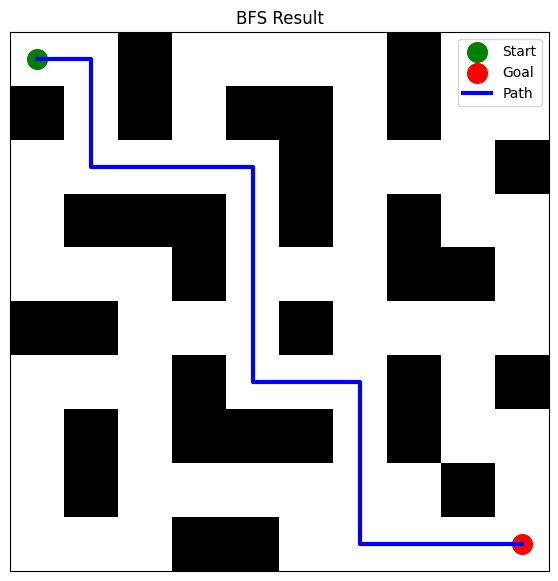


Running DFS...
DFS Path Length = 19


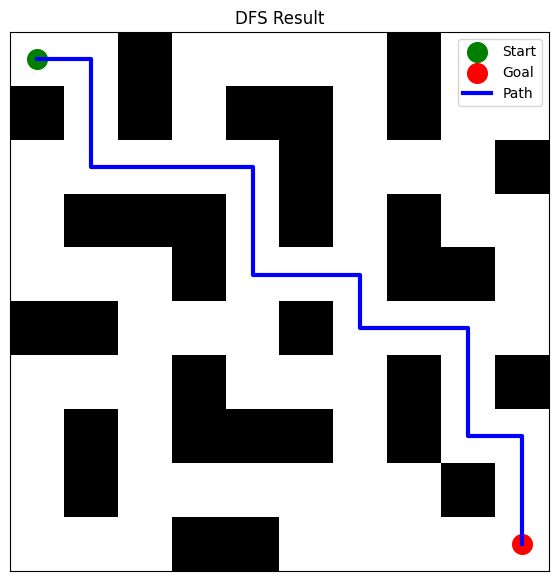


Running UCS...
UCS Path Length = 19


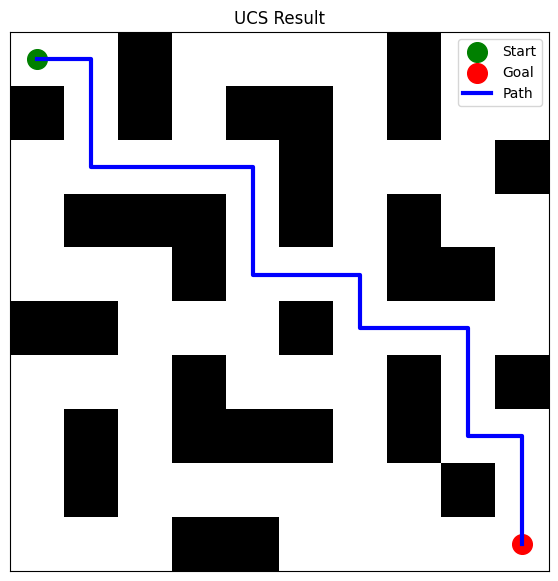


Running IDS...
IDS Path Length = 23


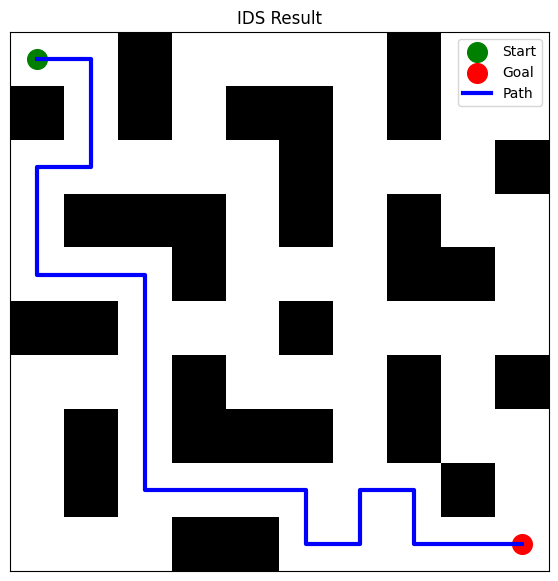


Running Greedy...
Greedy Path Length = 19


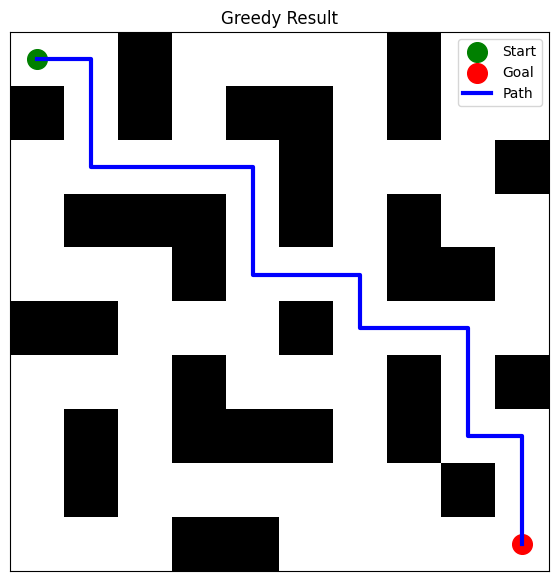


Running A*...
A* Path Length = 19


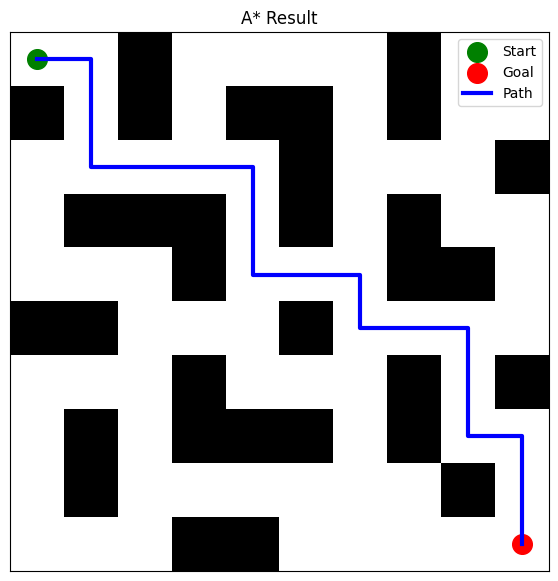

In [78]:
if __name__ == "__main__":
    algorithms = [
        ("BFS", BFS),
        ("DFS", DFS),
        ("UCS", UCS),
        ("IDS", IDS),
        ("Greedy", Greedy),
        ("A*", A_star),

    ]

    for name, algo in algorithms:
        print(f"\nRunning {name}...")
        path = algo(start, goal)

        if path:
            print(f"{name} Path Length = {len(path)}")
        else:
            print(f"{name} found no path")

        visualize_maze(maze, start, goal, path, title=f"{name} Result")

# ***Measure***

In [79]:
def measure(func):
    tracemalloc.start()
    t0 = time.time()

    path = func(start, goal)

    t1 = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    return {
        "found": path is not None,
        "path_length": len(path) if path else None,
        "time_ms": (t1 - t0) * 1000,
        "memory_kb": peak / 1024,
        "path": path
    }


In [80]:
results = {
    "BFS": measure(BFS),
    "DFS": measure(DFS),
    "UCS": measure(UCS),
    "IDS": measure(IDS),
    "Greedy": measure(Greedy),
    "A*": measure(A_star)
}
# Find optimal path length among successful algorithms
optimal_length = min(
    res["path_length"] for res in results.values() if res["path_length"] is not None
)

for name, res in results.items():
    res["completeness"] = "Complete" if res["found"] else "Not Complete"
    res["optimality"] = "Optimal" if res["path_length"] == optimal_length else "Not Optimal"

# ***Comparsion***

In [91]:
print("FINAL RESULTS \n")
for name, res in results.items():
    print(name,":")
    print("Found Path:",res['found'])
    print("Path Length:",res['path_length'])
    print("Time (ms):",res['time_ms'])
    print("Memory (KB):",res['memory_kb'])
    print("Completeness:",res['completeness'])
    print("Optimality:",res['optimality'])
    print()

FINAL RESULTS 

BFS :
Found Path: True
Path Length: 19
Time (ms): 0.6189346313476562
Memory (KB): 6.2578125
Completeness: Complete
Optimality: Optimal

DFS :
Found Path: True
Path Length: 19
Time (ms): 1.569509506225586
Memory (KB): 4.2998046875
Completeness: Complete
Optimality: Optimal

UCS :
Found Path: True
Path Length: 19
Time (ms): 1.2614727020263672
Memory (KB): 7.7265625
Completeness: Complete
Optimality: Optimal

IDS :
Found Path: True
Path Length: 23
Time (ms): 7.753133773803711
Memory (KB): 6.9609375
Completeness: Complete
Optimality: Not Optimal

Greedy :
Found Path: True
Path Length: 19
Time (ms): 0.2536773681640625
Memory (KB): 3.984375
Completeness: Complete
Optimality: Optimal

A* :
Found Path: True
Path Length: 19
Time (ms): 0.667572021484375
Memory (KB): 4.9296875
Completeness: Complete
Optimality: Optimal

